# Projeto 2 - Ciência dos Dados

**Dataset:** [https://www.kaggle.com/vicsuperman/prediction-of-music-genre](https://www.kaggle.com/vicsuperman/prediction-of-music-genre)

- Lucas Gurgel
- Gabriela Albuquerque
- João Pedro Lima
- Pedro Fracassi

## Índice

- [Introdução](#introducao)
- [Análise Exploratória](#analise)

In [117]:
!pip install plotly

import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = 'iframe_connected'
dddddd

NameError: name 'dddddd' is not defined

In [ ]:
print(f'Esperamos trabalhar no diretório {os.getcwd()}')

Esperamos trabalhar no diretório c:\Users\pedro\Projeto_2_Cdados


<div id="introducao">

# Introdução

Para o nosso P2, vamos criar um modelo para prever o gênero de uma música de acordo com algumas informações. Nosso dataset possui informações sobre músicas, como o nome, artista, gênero, tempo de duração e etc. Nossa coluna resposta é a coluna de gêneros, que é uma string com um de 11 gêneros musicais.


In [ ]:
df = pd.read_csv('music_genre.csv').drop(['obtained_date'], axis=1)
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


<div id="analise">

## Análise Exploratória dos Dados

Na análise exploratória, nosso objetivo é descobrir quais variáveis são significantes para a predição.

### `popularity` x `music_genre`

<Figure size 432x288 with 0 Axes>

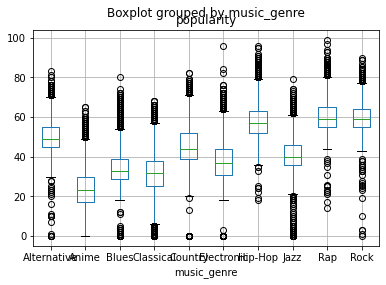

In [ ]:
plt.figure()
boxplot = df.boxplot(column='popularity', by='music_genre')
plt.show()

### `acousticness` x `music_genre`

<Figure size 432x288 with 0 Axes>

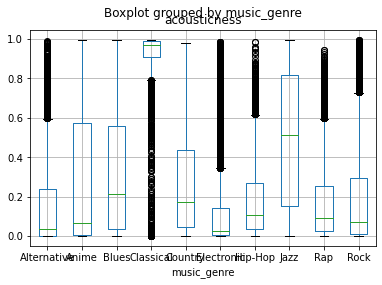

In [ ]:
plt.figure()
boxplot = df.boxplot(column='acousticness', by='music_genre')
plt.show()

### `danceability` x `music_genre`

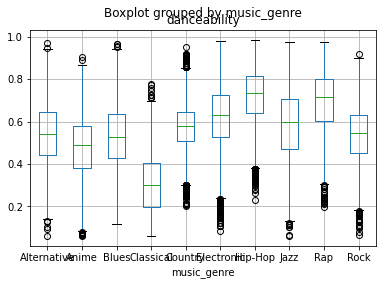

In [ ]:
boxplot = df.boxplot(column='danceability', by='music_genre')

### `duration (ms)` x `music_genre`

<Figure size 432x288 with 0 Axes>

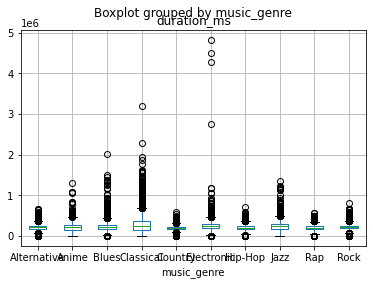

In [ ]:
plt.figure()
boxplot = df.boxplot(column='duration_ms', by='music_genre')
plt.show()

### `energy` x `music_genre`

<Figure size 432x288 with 0 Axes>

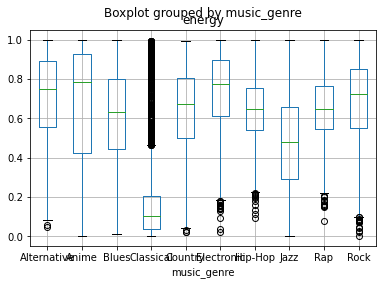

In [ ]:
plt.figure()
boxplot = df.boxplot(column='energy', by='music_genre')
plt.show()

### `instrumentalness` x `music_genre`

<Figure size 432x288 with 0 Axes>

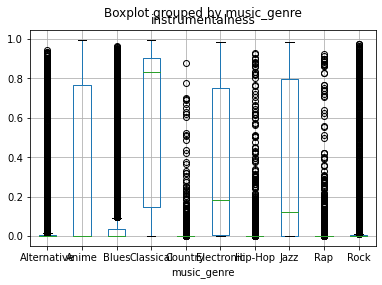

In [ ]:
plt.figure()
boxplot = df.boxplot(column='instrumentalness', by='music_genre')
plt.show()

### `liveness` x `music_genre`

<Figure size 432x288 with 0 Axes>

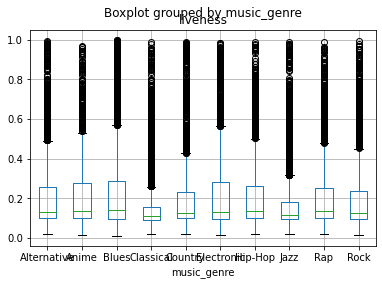

In [ ]:
plt.figure()
boxplot = df.boxplot(column='liveness', by='music_genre')
plt.show()

### `loudness` x `music_genre`

<Figure size 432x288 with 0 Axes>

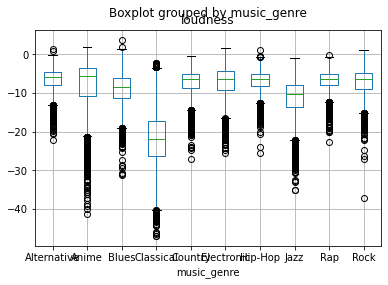

In [ ]:
plt.figure()
boxplot = df.boxplot(column='loudness', by='music_genre')
plt.show()

### `speechiness` x `music_genre`

<Figure size 432x288 with 0 Axes>

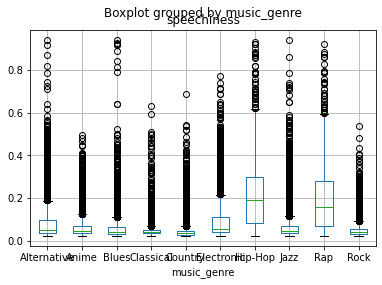

In [ ]:
plt.figure()
boxplot = df.boxplot(column='speechiness', by='music_genre')
plt.show()

### `valence` x `music_genre`

<Figure size 432x288 with 0 Axes>

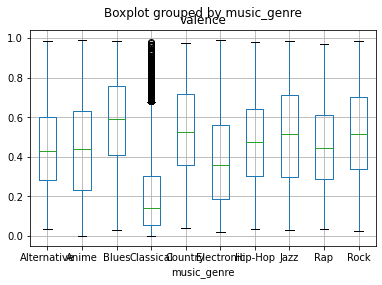

In [ ]:
plt.figure()
boxplot = df.boxplot(column='valence', by='music_genre')
plt.show()